A couple of years ago, J.K. Rowling (of Harry Potter fame) tried something interesting. She wrote a book, “The Cuckoo’s Calling,” under the name Robert Galbraith. The book received some good reviews, but no one paid much attention to it--until an anonymous tipster on Twitter said it was J.K. Rowling. The London Sunday Times enlisted two experts to compare the linguistic patterns of “Cuckoo” to Rowling’s “The Casual Vacancy,” as well as to books by several other authors. After the results of their analysis pointed strongly toward Rowling as the author, the Times directly asked the publisher if they were the same person, and the publisher confirmed. The book exploded in popularity overnight.

We’ll do something very similar in this project. We have a set of emails, half of which were written by one person and the other half by another person at the same company . Our objective is to classify the emails as written by one person or the other based only on the text of the email. We will start with Naive Bayes in this mini-project, and then expand in later projects to other algorithms.

We will start by giving you a list of strings. Each string is the text of an email, which has undergone some basic preprocessing; we will then provide the code to split the dataset into training and testing sets. (In the next lessons you’ll learn how to do this preprocessing and splitting yourself, but for now we’ll give the code to you).

One particular feature of Naive Bayes is that it’s a good algorithm for working with text classification. When dealing with text, it’s very common to treat each unique word as a feature, and since the typical person’s vocabulary is many thousands of words, this makes for a large number of features. The relative simplicity of the algorithm and the independent features assumption of Naive Bayes make it a strong performer for classifying texts. In this mini-project, you will download and install sklearn on your computer and use Naive Bayes to classify emails by author.

In [1]:
#!/usr/bin/python
import pickle
import _pickle as cPickle
import numpy

from sklearn import cross_validation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif



def preprocess(words_file = "data/word_data.pkl", authors_file="data/email_authors.pkl"):
    """ 
        this function takes a pre-made list of email texts (by default word_data.pkl)
        and the corresponding authors (by default email_authors.pkl) and performs
        a number of preprocessing steps:
            -- splits into training/testing sets (10% testing)
            -- vectorizes into tfidf matrix
            -- selects/keeps most helpful features

        after this, the feaures and labels are put into numpy arrays, which play nice with sklearn functions

        4 objects are returned:
            -- training/testing features
            -- training/testing labels

    """

    ### the words (features) and authors (labels), already largely preprocessed
    ### this preprocessing will be repeated in the text learning mini-project
    authors_file_handler = open(authors_file, "rb")
    authors = pickle.load(authors_file_handler)
    authors_file_handler.close()

    words_file_handler = open(words_file, "rb")
    word_data = cPickle.load(words_file_handler)
    words_file_handler.close()

    ### test_size is the percentage of events assigned to the test set
    ### (remainder go into training)
    features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(word_data, authors, test_size=0.1, random_state=42)



    ### text vectorization--go from strings to lists of numbers
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
    features_train_transformed = vectorizer.fit_transform(features_train)
    features_test_transformed  = vectorizer.transform(features_test)



    ### feature selection, because text is super high dimensional and 
    ### can be really computationally chewy as a result
    selector = SelectPercentile(f_classif, percentile=10)
    selector.fit(features_train_transformed, labels_train)
    features_train_transformed = selector.transform(features_train_transformed).toarray()
    features_test_transformed  = selector.transform(features_test_transformed).toarray()

    ### info on the data
    print("no. of Chris training emails:", sum(labels_train))
    print("no. of Sara training emails:", len(labels_train)-sum(labels_train))
    
    return features_train_transformed, features_test_transformed, labels_train, labels_test


C:\ProgramData\Anaconda3\envs\ttf\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### USE NAIVE BAYES

In [2]:
""" 
    This is the code to accompany the Lesson 1 (Naive Bayes) mini-project. 

    Use a Naive Bayes Classifier to identify emails by their authors
    
    authors and labels:
    Sara has label 0
    Chris has label 1
"""
import sys
from time import time

### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()


#########################################################
### your code goes here ###
from sklearn.naive_bayes import GaussianNB
def classify(features_train, labels_train):   
    ### import the sklearn module for GaussianNB
    ### create classifier
    ### fit the classifier on the training features and labels
    ### return the fit classifier
    t0 = time()
    clf = GaussianNB()
    clf.fit(features_train, labels_train)
    print("training time:", round(time()-t0, 3), "s")
    return clf
    
    
#import numpy as np
#import pylab as pl

clf_NB = classify(features_train, labels_train)


from sklearn.metrics import accuracy_score
t0 = time()
acc = accuracy_score(clf_NB.predict(features_test), labels_test)
print(acc)
print("prediction time:", round(time()-t0, 3), "s")
#########################################################

no. of Chris training emails: 7936
no. of Sara training emails: 7884
training time: 0.979 s
0.973265073948
prediction time: 0.151 s


### SVM

In [3]:
from sklearn.svm import SVC

t0 = time()
clf_SVM = SVC(kernel="linear")
clf_SVM.fit(features_train, labels_train)
print("training time:", round(time()-t0, 3), "s")


from sklearn.metrics import accuracy_score
t0 = time()
acc = accuracy_score(clf_SVM.predict(features_test), labels_test)
print(acc)
print("prediction time:", round(time()-t0, 3), "s")

training time: 182.341 s
0.984072810011
prediction time: 19.145 s


#### speed up by less train data and less accuracy (both prediction and training time will decrease)

One way to speed up an algorithm is to train it on a smaller training dataset. The tradeoff is that the accuracy almost always goes down when you do this. Let’s explore this more concretely: add in the following two lines immediately before training your classifier. 

features_train = features_train[:len(features_train)/100] 
labels_train = labels_train[:len(labels_train)/100] 

These lines effectively slice the training dataset down to 1% of its original size, tossing out 99% of the training data. You can leave all other code unchanged. What’s the accuracy now?

In [3]:
features_train_p, labels_train_p = features_train[:len(features_train)//100], labels_train[:len(labels_train)//100]
print(features_train_p.shape)
print(len(labels_train_p))

(158, 3785)
158


In [5]:
t0 = time()
clf_SVM = SVC(kernel="linear")
clf_SVM.fit(features_train_p, labels_train_p)
print("training time:", round(time()-t0, 3), "s")

t0 = time()
acc = accuracy_score(clf_SVM.predict(features_test), labels_test)
print(acc)
print("prediction time:", round(time()-t0, 3), "s")

training time: 0.102 s
0.884527872582
prediction time: 1.124 s


#### some case, speed is very important like detect the  credit card fraud and block the transiction

In [6]:
t0 = time()
#clf = SVC(kernel='rbf', C = 1,gamma = 100)
clf_SVM_rbf = SVC(kernel='rbf')
clf_SVM_rbf.fit(features_train_p, labels_train_p)
print("training time:", round(time()-t0, 3), "s")

t0 = time()
acc = accuracy_score(clf_SVM_rbf.predict(features_test), labels_test)
print(acc)
print("prediction time:", round(time()-t0, 3), "s")

training time: 0.121 s
0.616040955631
prediction time: 1.258 s


In [13]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

t0 = time()
#clf = SVC(kernel='rbf', C = 1,gamma = 100)
parameters = {'kernel':('rbf',), 'C':[10, 100, 1000,10000]}
svr = svm.SVC()
clf_SVM_GSCV = GridSearchCV(svr, parameters)
clf_SVM_GSCV.fit(features_train_p, labels_train_p)
print("training time:", round(time()-t0, 3), "s")

t0 = time()
acc = accuracy_score(clf_SVM_GSCV.predict(features_test), labels_test)
print(acc)
print("prediction time:", round(time()-t0, 3), "s")
print(clf_SVM_GSCV.best_params_)

training time: 1.652 s
0.892491467577
prediction time: 1.023 s
{'C': 10000, 'kernel': 'rbf'}


In [17]:
t0 = time()
#clf = SVC(kernel='rbf', C = 1,gamma = 100)
parameters = {'kernel':('rbf',), 'C':[10, 100, 1000,10000]}
svr = svm.SVC()
clf_SVM_GSCV = GridSearchCV(svr, parameters)
clf_SVM_GSCV.fit(features_train, labels_train)
print("training time:", round(time()-t0, 3), "s")

t0 = time()
acc = accuracy_score(clf_SVM_GSCV.predict(features_test), labels_test)
print(acc)
print("prediction time:", round(time()-t0, 3), "s")
print(clf_SVM_GSCV.best_params_)

training time: 7271.758 s
0.990898748578
prediction time: 12.386 s
{'C': 10000, 'kernel': 'rbf'}


In [22]:
import numpy as np
clf_SVM_GSCV.predict([features_test[10],features_test[26],features_test[50]])

array([1, 0, 1])

In [24]:
result = clf_SVM_GSCV.predict(features_test)
sum(result)         

877

Hopefully it’s becoming clearer what Sebastian meant when he said Naive Bayes is great for text--it’s faster and generally gives better performance than an SVM for this particular problem. Of course, there are plenty of other problems where an SVM might work better. Knowing which one to try when you’re tackling a problem for the first time is part of the art and science of machine learning. In addition to picking your algorithm, depending on which one you try, there are parameter tunes to worry about as well, and the possibility of overfitting (especially if you don’t have lots of training data).

Our general suggestion is to try a few different algorithms for each problem. Tuning the parameters can be a lot of work, but just sit tight for now--toward the end of the class we will introduce you to GridCV, a great sklearn tool that can find an optimal parameter tune almost automatically.

### DESICION TREE

In [26]:
from sklearn import tree
t0 = time()
clf_DT = tree.DecisionTreeClassifier(min_samples_split=40)
clf_DT.fit(features_train, labels_train)
print("training time:", round(time()-t0, 3), "s")

t0 = time()
acc = accuracy_score(clf_DT.predict(features_test), labels_test)
print(acc)
print("prediction time:", round(time()-t0, 3), "s")

training time: 41.544 s
0.976678043231
prediction time: 0.024 s


You found in the SVM mini-project that the parameter tune can significantly speed up the training time of a machine learning algorithm. A general rule is that the parameters can tune the complexity of the algorithm, with more complex algorithms generally running more slowly.

Another way to control the complexity of an algorithm is via the number of features that you use in training/testing. The more features the algorithm has available, the more potential there is for a complex fit. We will explore this in detail in the “Feature Selection” lesson, but you’ll get a sneak preview now.

What's the number of features in your data? (Hint: the data is organized into a numpy array where the number of rows is the number of data points and the number of columns is the number of features; so to extract this number, use a line of code like len(features_train[0]).)

In [27]:
def preprocess_x(words_file = "data/word_data.pkl", authors_file="data/email_authors.pkl"):
    """ 
        this function takes a pre-made list of email texts (by default word_data.pkl)
        and the corresponding authors (by default email_authors.pkl) and performs
        a number of preprocessing steps:
            -- splits into training/testing sets (10% testing)
            -- vectorizes into tfidf matrix
            -- selects/keeps most helpful features

        after this, the feaures and labels are put into numpy arrays, which play nice with sklearn functions

        4 objects are returned:
            -- training/testing features
            -- training/testing labels

    """

    ### the words (features) and authors (labels), already largely preprocessed
    ### this preprocessing will be repeated in the text learning mini-project
    authors_file_handler = open(authors_file, "rb")
    authors = pickle.load(authors_file_handler)
    authors_file_handler.close()

    words_file_handler = open(words_file, "rb")
    word_data = cPickle.load(words_file_handler)
    words_file_handler.close()

    ### test_size is the percentage of events assigned to the test set
    ### (remainder go into training)
    features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(word_data, authors, test_size=0.1, random_state=42)



    ### text vectorization--go from strings to lists of numbers
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
    features_train_transformed = vectorizer.fit_transform(features_train)
    features_test_transformed  = vectorizer.transform(features_test)



    ### feature selection, because text is super high dimensional and 
    ### can be really computationally chewy as a result
    selector = SelectPercentile(f_classif, percentile=1)
    selector.fit(features_train_transformed, labels_train)
    features_train_transformed = selector.transform(features_train_transformed).toarray()
    features_test_transformed  = selector.transform(features_test_transformed).toarray()

    ### info on the data
    print("no. of Chris training emails:", sum(labels_train))
    print("no. of Sara training emails:", len(labels_train)-sum(labels_train))
    
    return features_train_transformed, features_test_transformed, labels_train, labels_test

features_trainX, features_testX, labels_trainX, labels_testX = preprocess_x()
print(features_train.shape)
print(features_trainX.shape)

no. of Chris training emails: 7936
no. of Sara training emails: 7884
(15820, 3785)
(15820, 379)


In [28]:
from sklearn import tree
t0 = time()
clf_DTX = tree.DecisionTreeClassifier(min_samples_split=40)
clf_DTX.fit(features_trainX, labels_trainX)
print("training time:", round(time()-t0, 3), "s")

t0 = time()
acc = accuracy_score(clf_DTX.predict(features_testX), labels_testX)
print(acc)
print("prediction time:", round(time()-t0, 3), "s")

training time: 3.616 s
0.967007963595
prediction time: 0.008 s


### RESEARCH ON SOME OTHER ALGORIGHTM
A critical skill for any data analyst is the ability to figure out new things about machine learning, which is the goal for this lesson. The whole lesson is a mini-project. The goal is to do terrain classification with an algorithm of your choice, researching and deploying it on your own.

Your algorithm choices are the following:

**k nearest neighbors  
random forest  
adaboost (sometimes also called boosted decision tree)  **

We can’t check your results, because there are too many combinations of algorithms and parameters to check everything that you could try, but you have seen the accuracy that our previous algorithms (Naive Bayes, SVM, decision tree) achieved and can self-assess whether the new algorithm does better.

In the choose_your_own/your_algorithm.py file, you’ll find some starter code to get the data all set up for you. The following videos also give a little more background on the algorithms and process you should follow, but you’re mostly finding your own way here. Good luck!

<IMG SRC='IMAGE/0.PNG'>

In [42]:
from sklearn.ensemble import RandomForestClassifier
t0 = time()
clf_RF = RandomForestClassifier(n_estimators = 35,max_depth=100, n_jobs =6,min_samples_split =5,random_state=0)
clf_RF.fit(features_train, labels_train)
print("training time:", round(time()-t0, 3), "s")

t0 = time()
acc = accuracy_score(clf_RF.predict(features_test), labels_test)
print(acc)
print("prediction time:", round(time()-t0, 3), "s")

training time: 3.007 s
0.990329920364
prediction time: 0.127 s


In [44]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

t0 = time()
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=50, min_samples_split=10, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=20, learning_rate=0.8)

bdt.fit(features_train, labels_train)
print("training time:", round(time()-t0, 3), "s")

t0 = time()
acc = accuracy_score(bdt.predict(features_test), labels_test)
print(acc)
print("prediction time:", round(time()-t0, 3), "s")

training time: 353.258 s
0.998293515358
prediction time: 0.13 s


### Aaron

<IMG SRC='IMAGE/2.PNG'>

#### The Enron fraud is a big, messy and totally fascinating story about corporate malfeasance of nearly every imaginable type. The Enron email and financial datasets are also big, messy treasure troves of information, which become much more useful once you know your way around them a bit. We’ve combined the email and finance data into a single dataset, which you’ll explore in this mini-project.

The aggregated Enron email + financial dataset is stored in a dictionary, where each key in the dictionary is a person’s name and the value is a dictionary containing all the features of that person.
The email + finance (E+F) data dictionary is stored as a pickle file, which is a handy way to store and load python objects directly. Use datasets_questions/explore_enron_data.py to load the dataset.

In [47]:
""" 
    Starter code for exploring the Enron dataset (emails + finances);
    loads up the dataset (pickled dict of dicts).

    The dataset has the form:
    enron_data["LASTNAME FIRSTNAME MIDDLEINITIAL"] = { features_dict }

    {features_dict} is a dictionary of features associated with that person.
    You should explore features_dict as part of the mini-project,
    but here's an example to get you started:

    enron_data["SKILLING JEFFREY K"]["bonus"] = 5600000
    
"""

import pickle
enron_data = pickle.load(open("data/final_project_dataset.pkl", "rb"))

In [65]:
print(type(enron_data))
for key, val in enron_data.items():
    print(key, val)
print("number of instance",len(enron_data.keys()))
print("number of features",len(enron_data["SKILLING JEFFREY K"].keys()))

<class 'dict'>
KOPPER MICHAEL J {'poi': True, 'director_fees': 'NaN', 'long_term_incentive': 602671, 'exercised_stock_options': 'NaN', 'from_poi_to_this_person': 'NaN', 'other': 907502, 'restricted_stock_deferred': 'NaN', 'from_this_person_to_poi': 'NaN', 'salary': 224305, 'total_payments': 2652612, 'from_messages': 'NaN', 'shared_receipt_with_poi': 'NaN', 'loan_advances': 'NaN', 'total_stock_value': 985032, 'deferred_income': 'NaN', 'to_messages': 'NaN', 'bonus': 800000, 'restricted_stock': 985032, 'expenses': 118134, 'deferral_payments': 'NaN', 'email_address': 'michael.kopper@enron.com'}
HAYES ROBERT E {'poi': False, 'director_fees': 'NaN', 'long_term_incentive': 'NaN', 'exercised_stock_options': 'NaN', 'from_poi_to_this_person': 16, 'other': 'NaN', 'restricted_stock_deferred': 'NaN', 'from_this_person_to_poi': 0, 'salary': 'NaN', 'total_payments': 7961, 'from_messages': 12, 'shared_receipt_with_poi': 50, 'loan_advances': 'NaN', 'total_stock_value': 151418, 'deferred_income': 'NaN',

In [60]:
number_of_POI =0
for key, val in enron_data.items():
    if val['poi'] == True:
        number_of_POI +=1
print("number_of_POI: ",number_of_POI)   

number_of_POI:  18


In [67]:
print(enron_data['PRENTICE JAMES'])

{'poi': False, 'director_fees': 'NaN', 'long_term_incentive': 'NaN', 'exercised_stock_options': 886231, 'from_poi_to_this_person': 'NaN', 'other': 'NaN', 'restricted_stock_deferred': 'NaN', 'from_this_person_to_poi': 'NaN', 'salary': 'NaN', 'total_payments': 564348, 'from_messages': 'NaN', 'shared_receipt_with_poi': 'NaN', 'loan_advances': 'NaN', 'total_stock_value': 1095040, 'deferred_income': 'NaN', 'to_messages': 'NaN', 'bonus': 'NaN', 'restricted_stock': 208809, 'expenses': 'NaN', 'deferral_payments': 564348, 'email_address': 'james.prentice@enron.com'}


'poi':  WHETHER THIS PERSON IS POI
'director_fees': 'NaN', 
'long_term_incentive': 'NaN', 
'exercised_stock_options': STOCK OPTIONS
'from_poi_to_this_person': HOW MANY MESSENGE IS RECIEVED FROM POI TO THIS PERSON
'other': 'NaN', 
'restricted_stock_deferred': 'NaN', 
'from_this_person_to_poi': HOW MANY MESSENGE IS SEND FROM THIS PERSON TO POI
'salary': SALARY  
'total_payments': TAKE THE HOME BACK
'from_messages': 'NaN', 
'shared_receipt_with_poi': 'NaN', 
'loan_advances': 'NaN', 
'total_stock_value': TOTAL STOCK VALUE
'deferred_income': 'NaN', 
'to_messages': 'NaN', 
'bonus': BONUS
'restricted_stock': 208809, 
'expenses': 'NaN', 
'deferral_payments': 564348, 
'email_address': 'james.prentice@enron.com'


A python dictionary can’t be read directly into an sklearn classification or regression algorithm; instead, it needs a numpy array or a list of lists (each element of the list (itself a list) is a data point, and the elements of the smaller list are the features of that point).

We’ve written some helper functions (featureFormat() and targetFeatureSplit()) that can take a list of feature names and the data dictionary, and return a numpy array.

In the case when a feature does not have a value for a particular person, this function will also replace the feature value with 0 (zero).

In [70]:
""" 
    A general tool for converting data from the dictionary format to an (n x k) python list
    that's ready for training an sklearn algorithm

    n--no. of key-value pairs in dictonary
    k--no. of features being extracted

    dictionary keys are names of persons in dataset, dictionary values are dictionaries
    where each key-value pair in the dict is the name of a feature, and its value for that person

    In addition to converting a dictionary to a numpy array, 
    you may want to separate the labels from the features
    --this is what targetFeatureSplit is for

    so, if you want to have the poi label as the target,
    and the features you want to use are the person's
    salary and bonus, here's what you would do:

    feature_list = ["poi", "salary", "bonus"] 
    data_array = featureFormat( data_dictionary, feature_list )
    label, features = targetFeatureSplit(data_array)

    the line above (targetFeatureSplit) assumes that the
    label is the _first_ item in feature_list--very important
    that poi is listed first!
"""
import numpy as np

def featureFormat( dictionary, features, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = False):
    """ convert dictionary to numpy array of features
        remove_NaN = True will convert "NaN" string to 0.0
        remove_all_zeroes = True will omit any data points for which
            all the features you seek are 0.0
        remove_any_zeroes = True will omit any data points for which
            any of the features you seek are 0.0
        sort_keys = True sorts keys by alphabetical order. Setting the value as
            a string opens the corresponding pickle file with a preset key
            order (this is used for Python 3 compatibility, and sort_keys
            should be left as False for the course mini-projects).
        NOTE: first feature is assumed to be 'poi' and is not checked for
            removal for zero or missing values.
    """

    return_list = []

    # Key order - first branch is for Python 3 compatibility on mini-projects,
    # second branch is for compatibility on final project.
    if isinstance(sort_keys, str):
        import pickle
        keys = pickle.load(open(sort_keys, "rb"))
    elif sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    for key in keys:
        tmp_list = []
        for feature in features:
            try:
                dictionary[key][feature]
            except KeyError:
                print("error: key ", feature, " not present")
                return
            value = dictionary[key][feature]
            if value=="NaN" and remove_NaN:
                value = 0
            tmp_list.append( float(value) )

        # Logic for deciding whether or not to add the data point.
        append = True
        # exclude 'poi' class as criteria.
        if features[0] == 'poi':
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
        ### if all features are zero and you want to remove
        ### data points that are all zero, do that here
        if remove_all_zeroes:
            append = False
            for item in test_list:
                if item != 0 and item != "NaN":
                    append = True
                    break
        ### if any features for a given data point are zero
        ### and you want to remove data points with any zeroes,
        ### handle that here
        if remove_any_zeroes:
            if 0 in test_list or "NaN" in test_list:
                append = False
        ### Append the data point if flagged for addition.
        if append:
            return_list.append( np.array(tmp_list) )

    return np.array(return_list)


def targetFeatureSplit( data ):
    """ 
        given a numpy array like the one returned from
        featureFormat, separate out the first feature
        and put it into its own list (this should be the 
        quantity you want to predict)

        return targets and features as separate lists

        (sklearn can generally handle both lists and numpy arrays as 
        input formats when training/predicting)
    """

    target = []
    features = []
    for item in data:
        target.append( item[0] )
        features.append( item[1:] )

    return target, features




feature_list = ["poi", "salary", "bonus"] 
data_array = featureFormat( enron_data, feature_list )
print(data_array[0])

[  1.00000000e+00   2.24305000e+05   8.00000000e+05]


### regression

In this project, you will use regression to predict financial data for Enron employees and associates. Once you know some financial data about an employee, like their salary, what would you predict for the size of their bonus?

[ 1.19214699]
554478.756215


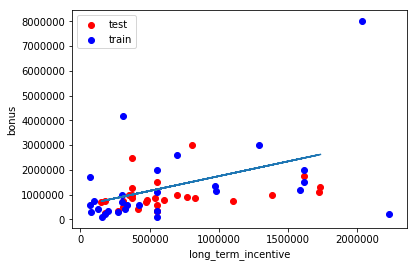

In [83]:
"""
    Starter code for the regression mini-project.
    
    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).

    Draws a little scatterplot of the training/testing data

    You fill in the regression code where indicated:
"""    


import sys
import pickle
dictionary = pickle.load( open("data/final_project_dataset_modified.pkl", "rb") )

### list the features you want to look at--first item in the 
### list will be the "target" feature
#features_list = ["bonus", "salary"]
features_list = ["bonus", "long_term_incentive"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True,sort_keys = 'data/python2_lesson06_keys.pkl')
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.

from sklearn import linear_model
from sklearn.linear_model import Ridge
#reg = linear_model.Ridge (alpha = .5)
#reg.fit () 
#Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
#      normalize=False, random_state=None, solver='auto', tol=0.001)


reg = linear_model.LinearRegression()
reg.fit (feature_train,target_train) 
print(reg.coef_)
print(reg.intercept_) 


### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()


In [84]:
# R^2
print("train", reg.score(feature_train,target_train))
print("test", reg.score(feature_test,target_test))

train 0.217085971258
test -0.59271289995


[ 5.44814029]
-102360.543294


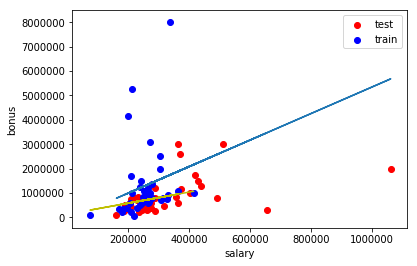

train -0.123597985403
test 0.251488150398


In [91]:
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True,sort_keys = 'data/python2_lesson06_keys.pkl')
target, features = targetFeatureSplit( data )
### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



from sklearn import linear_model
from sklearn.linear_model import Ridge

reg = linear_model.LinearRegression()
reg.fit (feature_train,target_train) 
print(reg.coef_)
print(reg.intercept_) 


### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass

reg.fit(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="y") 

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

# R^2
print("train", reg.score(feature_train,target_train))
print("test", reg.score(feature_test,target_test))

This is a sneak peek of the next lesson, on outlier identification and removal. Go back to a setup where you are using the salary to predict the bonus, and rerun the code to remind yourself of what the data look like. You might notice a few data points that fall outside the main trend, someone who gets a high salary (over a million dollars!) but a relatively small bonus. This is an example of an outlier, and we’ll spend lots of time on them in the next lesson.

A point like this can have a big effect on a regression: if it falls in the training set, it can have a significant effect on the slope/intercept if it falls in the test set, it can make the score much lower than it would otherwise be As things stand right now, this point falls into the test set (and probably hurting the score on our test data as a result). Let’s add a little hack to see what happens if it falls in the training set instead. Add these two lines near the bottom of finance_regression.py, right before plt.xlabel(features_list[1]):

reg.fit(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="b") 

Now we’ll be drawing two regression lines, one fit on the test data (with outlier) and one fit on the training data (no outlier). Look at the plot now--big difference, huh? That single outlier is driving most of the difference. What’s the slope of the new regression line?

(That’s a big difference, and it’s mostly driven by the outliers. The next lesson will dig into outliers in more detail so you have tools to detect and deal with them.)

In [95]:
features_list = ["bonus", "salary", "long_term_incentive"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True,sort_keys = 'data/python2_lesson06_keys.pkl')
target, features = targetFeatureSplit( data )
### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)

reg =linear_model.Lasso(alpha=0.1)
#reg = linear_model.Ridge (alpha = .5)
reg.fit(feature_train, target_train)
print("train", reg.score(feature_train,target_train))
print("test", reg.score(feature_test,target_test))

train 0.22178257305
test -0.464947882471


### OUTLIER

This project has two parts. In the first part, you will run a regression, and identify and remove the 10% of points that have the largest residual errors. Then you’ll remove those outliers from the dataset and refit the regression, just like the strategy that Sebastian suggested in the lesson videos.

In the second part, you will get acquainted with some of the outliers in the Enron finance data, and learn if/how to remove them.

In [118]:
import heapq

li = [5, 7, 9, 1, 3]
li_copy = li[:]
# using heapify to convert list into heap
heapq.heapify(li_copy)
print(li)
print(li_copy)
# using heappush() to push elements into heap
# pushes 4
heapq.heappush(li_copy,4)
print(li)
print(li_copy)

[5, 7, 9, 1, 3]
[1, 3, 9, 7, 5]
[5, 7, 9, 1, 3]
[1, 3, 4, 7, 5, 9]


In [143]:
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    cleaned_data =[]
    
    number_of_removed_element = len(net_worths)//10
    
    dif_2 = (predictions - net_worths)**2
    dif_copy = dif_2[:,0].tolist()
    dif_copy.sort()
    
    removed_element = dif_copy[-number_of_removed_element:]
    
    #print(removed_element)
    
    for i in range(len(ages)):
        if dif_2[i] in removed_element:
            pass
        else:
            cleaned_data.append((ages[i],net_worths[i],dif_2[i]))
            
    
    
    #print(len(cleaned_data))

    ### your code goes here

    
    return cleaned_data

cleaned_data = outlierCleaner( reg.predict(ages_train), ages_train, net_worths_train )

[[ 5.07793064]]
[ 25.21002155]
test 0.878262470366


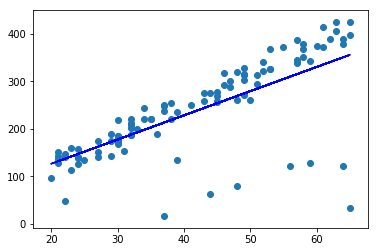

[[ 6.36859481]]
[-6.91861069]
test 0.983189455396


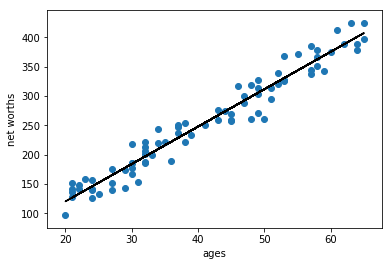

In [147]:
#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
import pickle


### load up some practice data with outliers in it
ages = pickle.load( open("data/practice_outliers_ages.pkl", "rb") )
net_worths = pickle.load( open("data/practice_outliers_net_worths.pkl", "rb") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points and n_columns is the number of features

ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like


reg = linear_model.LinearRegression()
reg.fit (ages_train,net_worths_train) 
print(reg.coef_)
print(reg.intercept_) 
print("test", reg.score(ages_test,net_worths_test))






try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print ("your regression object doesn't exist, or isn't name reg")
    print ("can't make predictions to use in identifying outliers")







### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="black")
        print(reg.coef_)
        print(reg.intercept_) 
        print("test", reg.score(ages_test,net_worths_test))
    except NameError:
        print ("you don't seem to have regression imported/created,")
        print ("   or else your regression object isn't named reg")
        print ("   either way, only draw the scatter plot of the cleaned data")
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print ("outlierCleaner() is returning an empty list, no refitting to be done")



In the mini-project for the regressions lesson, you used a regression to predict the bonuses for Enron employees. As you saw, even a single outlier can make a big difference on the regression result. There was something we didn’t tell you, though, which was that the dataset we had you use in that project had already been cleaned of some significant outliers. Identifying and cleaning away outliers is something you should always think about when looking at a dataset for the first time, and now you’ll get some hands-on experience with the Enron data.

Reads in the data (in dictionary form) and converts it into a sklearn-ready numpy array. Since there are two features being extracted from the dictionary (“salary” and “bonus”), the resulting numpy array will be of dimension N x 2, where N is the number of data points and 2 is the number of features. This is perfect input for a scatterplot; we’ll use the matplotlib.pyplot module to make that plot. (We’ve been using pyplot for all the visualizations in this course.) Add these lines to the bottom of the script to make your scatterplot:

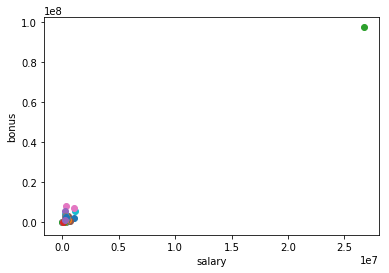

In [149]:
import pickle
import sys
import matplotlib.pyplot

### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("data/final_project_dataset.pkl", "rb") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)


for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [156]:
# biggest outlier
data_dict = pickle.load( open("data/final_project_dataset.pkl", "rb") )
for key,val in data_dict.items():
    try:
        if int(val['salary']) > 1e7:
            print(key)
    except:
        pass

TOTAL


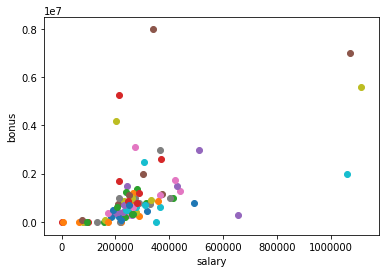

In [159]:
data_dict.pop( 'TOTAL', 0 )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)


for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [164]:
for key,val in data_dict.items():
    try:
        if int(val['bonus']) > 3e6 and int(val['salary']) > 1e6:
            print(key)
    except:
        pass

SKILLING JEFFREY K
LAY KENNETH L


Would you guess that these are typos or weird spreadsheet lines that we should remove, or that there’s a meaningful reason why these points are different? (In other words, should they be removed before we, say, try to build a POI identifier?)  
**keep it since they are potientially POI**

## unsupervised

### K-means (cluster)

In this project, we’ll apply k-means clustering to our Enron financial data. Our final goal, of course, is to identify persons of interest; since we have labeled data, this is not a question that particularly calls for an unsupervised approach like k-means clustering.

Nonetheless, you’ll get some hands-on practice with k-means in this project, and play around with feature scaling, which will give you a sneak preview of the next lesson’s material.

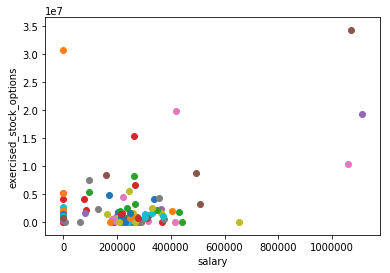

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0]
centers:  [[   200320.46218487   1507501.63865546]
 [   573218.8         23904558.        ]]


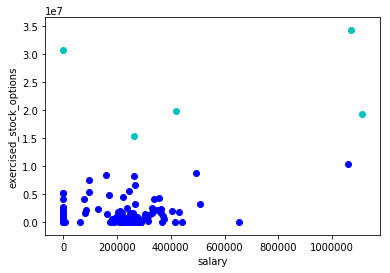

In [173]:
import pickle
import numpy
import matplotlib.pyplot as plt
import sys


def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("data/final_project_dataset.pkl", "rb") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
#'''
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
    
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.show()
#'''
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=2, random_state=0).fit(finance_features)
print(kmeans.labels_)
print("centers: ", kmeans.cluster_centers_)
pred = kmeans.predict(finance_features)

### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("no predictions object named pred found, no clusters to plot")


Add a third feature to features_list, “total_payments". Now rerun clustering, using 3 input features instead of 2 (obviously we can still only visualize the original 2 dimensions). Compare the plot with the clusterings to the one you obtained with 2 input features. Do any points switch clusters? How many? This new clustering, using 3 features, couldn’t have been guessed by eye--it was the k-means algorithm that identified it.

(You'll need to change the code that makes the scatterplot to accommodate 3 features instead of 2, see the comments in the starter code for instructions on how to do this.)

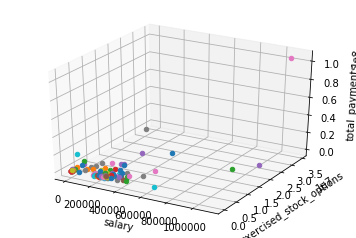

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
centers:  [[  1.85738464e+05   1.91715291e+06   1.60684372e+06]
 [  1.07232100e+06   3.43483840e+07   1.03559793e+08]]


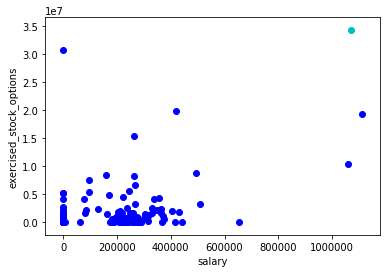

In [182]:
data_dict = pickle.load( open("data/final_project_dataset.pkl", "rb") )
data_dict.pop("TOTAL", 0)

feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2,feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
#'''
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for f1, f2 , f3 in finance_features:
    ax.scatter(f1, f2 , f3)
    
ax.set_xlabel(feature_1)
ax.set_ylabel(feature_2)
ax.set_zlabel(feature_3)   
plt.show()

#'''
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=2, random_state=0).fit(finance_features)
print(kmeans.labels_)
print("centers: ", kmeans.cluster_centers_)
pred = kmeans.predict(finance_features)

### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("no predictions object named pred found, no clusters to plot")


In the next lesson, we’ll talk about feature scaling. It’s a type of feature preprocessing that you should perform before some classification and regression tasks. Here’s a sneak preview that should call your attention to the general outline of what feature scaling does.

What are the maximum and minimum values taken by the “exercised_stock_options” feature used in this example?

(NB: if you look at finance_features, there are some "NaN" values that have been cleaned away and replaced with zeroes--so while those might look like the minima, it's a bit deceptive because they're more like points for which we don't have information, and just have to put in a number. So for this question, go back to data_dict and look for the maximum and minimum numbers that show up there, ignoring all the "NaN" entries.)

### SCALING

The plot on the next slide shows the exact same clustering code that you just wrote, but in this example we applied feature scaling before performing the clustering.

We want you to compare the clustering with scaling (on the next slide) with the first clustering visualization you produced, when you used two features in your clustering algorithm.

Notice that now the range of the features has changed to [0.0, 1.0]. That's the only change we've made.

In the next lesson you’ll learn a lot more about what feature scaling means

**In the last project, you performed k-means clustering on the Enron characters using their financial data as inputs. We’ll update that work to include scaled features, to see how that changes things.**

In [194]:
# Here is an example to scale a toy data matrix to the [0, 1] range:
from sklearn.preprocessing import MinMaxScaler
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.],
                    [ 5.,    5.,   4.]])
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
print(X_train_minmax)

[[ 0.2         0.          0.6       ]
 [ 0.4         0.16666667  0.2       ]
 [ 0.          0.33333333  0.        ]
 [ 1.          1.          1.        ]]


[[ 0.17997621  0.02911345]]


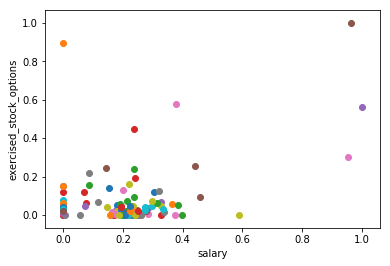

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1]
centers:  [[ 0.65963926  0.66723454]
 [ 0.17422213  0.04509486]]


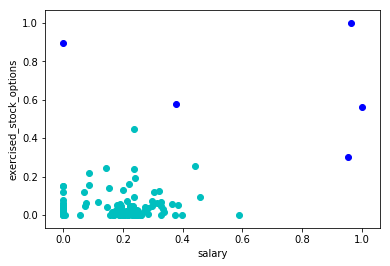

In [198]:
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )
min_max_scaler = MinMaxScaler()
finance_features = min_max_scaler.fit_transform(finance_features)

print(min_max_scaler.transform([[200000.,1000000.]]))
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
#'''
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
    
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.show()
#'''
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=2, random_state=0).fit(finance_features)
print(kmeans.labels_)
print("centers: ", kmeans.cluster_centers_)
pred = kmeans.predict(finance_features)

### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("no predictions object named pred found, no clusters to plot")


### Learn from text

In [224]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
corpus = [
     'This is the first document.',
     'This is the second second document.',
     'And the third one.',
     'Is this the first document?']
vectorizer.fit(corpus)
print(vectorizer.get_feature_names())
print(vectorizer.transform(corpus))
print()
print(X.transform(["this this ","This","and is"]))

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 6)	1
  (0, 8)	1
  (1, 1)	1
  (1, 3)	1
  (1, 5)	2
  (1, 6)	1
  (1, 8)	1
  (2, 0)	1
  (2, 4)	1
  (2, 6)	1
  (2, 7)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	1
  (3, 6)	1
  (3, 8)	1

  (0, 8)	2
  (1, 8)	1
  (2, 0)	1
  (2, 3)	1


In [210]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

data = "All work and no play makes jack dull boy. All work and no play makes jack a dull boy."
stopWords = set(stopwords.words('english'))

print(len(stopWords))
count = 0
for a in stopWords:
    print(a)
    count += 1
    if count > 10:
        break

words = word_tokenize(data)
wordsFiltered = []
 
for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)
 
print(wordsFiltered)

153
whom
most
who
not
ain
through
was
aren
wasn
hasn
any
['All', 'work', 'play', 'makes', 'jack', 'dull', 'boy', '.', 'All', 'work', 'play', 'makes', 'jack', 'dull', 'boy', '.']


In [211]:
from nltk.stem.snowball import SnowballStemmer
# See which languages are supported.
print(" ".join(SnowballStemmer.languages))
# Create a new instance of a language specific subclass.
stemmer = SnowballStemmer("english")
# Stem a word.
print(stemmer.stem("running"))


#Decide not to stem stopwords.
stemmer2 = SnowballStemmer("english", ignore_stopwords=True)
print(stemmer.stem("having"))
print(stemmer2.stem("having"))

# The 'english' stemmer is better than the original 'porter' stemmer.
print(SnowballStemmer("english").stem("generously"))
print(SnowballStemmer("porter").stem("generously"))


arabic danish dutch english finnish french german hungarian italian norwegian porter portuguese romanian russian spanish swedish
run
have
having
generous
gener


In the beginning of this class, you identified emails by their authors using a number of supervised classification algorithms. In those projects, we handled the preprocessing for you, transforming the input emails into a TfIdf so they could be fed into the algorithms. Now you will construct your own version of that preprocessing step, so that you are going directly from raw data to processed features.

You will be given two text files: one contains the locations of all the emails from Sara, the other has emails from Chris. You will also have access to the parseOutText() function, which accepts an opened email as an argument and returns a string containing all the (stemmed) words in the email.

parseOutText() takes the opened email and returns only the text part, stripping away any metadata that may occur at the beginning of the email, so what's left is the text of the message. We currently have this script set up so that it will print the text of the email to the screen, what is the text that you get when you run parseOutText()?

In [248]:
from nltk.stem.snowball import SnowballStemmer
import string

def parseOutText(f):
    """ given an opened email file f, parse out all text below the
        metadata block at the top
        (in Part 2, you will also add stemming capabilities)
        and return a string that contains all the words
        in the email (space-separated) 
        
        example use case:
        f = open("email_file_name.txt", "r")
        text = parseOutText(f)
        
        """

    f.seek(0)  ### go back to beginning of file (annoying)
    all_text = f.read()

    ### split off metadata
    content = all_text.split("X-FileName:")
    words = ""
    if len(content) > 1:
        ### remove punctuation
        #print(content[1])
        #print(string.punctuation)
        #translator = str.maketrans(string.punctuation)
        #text_string = content[1].translate(str.maketrans(dict.fromkeys(',!.')))
        #text_string = content[1].translate(str.maketrans(dict.fromkeys(string.punctuation)))
        #print(text_string)
        ### project part 2: comment out the line below
        translator = str.maketrans('', '', string.punctuation)
        text_string = content[1].translate(translator)
        

        ### split the text string into individual words, stem each word,
        ### and append the stemmed word to words (make sure there's a single
        ### space between each stemmed word)
        result = ""
        from nltk.stem.snowball import SnowballStemmer
        stemmer = SnowballStemmer("english")
        for e in text_string.split():
            result += stemmer.stem(e) +" "
        words = result
        

    return words

ff = open("data/test_email.txt", "r")
text = parseOutText(ff)
print(text)   
'''
def main():
    ff = open("../text_learning/test_email.txt", "r")
    text = parseOutText(ff)
    print text



if __name__ == '__main__':
    main()
'''


hi everyon if you can read this messag your proper use parseouttext pleas proceed to the next part of the project 


'\ndef main():\n    ff = open("../text_learning/test_email.txt", "r")\n    text = parseOutText(ff)\n    print text\n\n\n\nif __name__ == \'__main__\':\n    main()\n'

You will iterate through all the emails from Chris and from Sara. For each email, feed the opened email to parseOutText() and return the stemmed text string. Then do two things:

remove signature words (“sara”, “shackleton”, “chris”, “germani”--bonus points if you can figure out why it's "germani" and not "germany")
append the updated text string to word_data -- if the email is from Sara, append 0 (zero) to from_data, or append a 1 if Chris wrote the email.
Once this step is complete, you should have two lists: one contains the stemmed text of each email, and the second should contain the labels that encode (via a 0 or 1) who the author of that email is.

Running over all the emails can take a little while (5 minutes or more), so we've added a temp_counter to cut things off after the first 200 emails. Of course, once everything is working, you'd want to run over the full dataset.

In the box below, put the string that you get for word_data[152].

In [265]:
import os
import pickle
import re
import sys

"""
    Starter code to process the emails from Sara and Chris to extract
    the features and get the documents ready for classification.

    The list of all the emails from Sara are in the from_sara list
    likewise for emails from Chris (from_chris)

    The actual documents are in the Enron email dataset, which
    you downloaded/unpacked in Part 0 of the first mini-project. If you have
    not obtained the Enron email corpus, run startup.py in the tools folder.

    The data is stored in lists and packed away in pickle files at the end.
"""


from_sara  = open("data/from_sara.txt", "r")
from_chris = open("data/from_chris.txt", "r")

from_data = []
word_data = []

### temp_counter is a way to speed up the development--there are
### thousands of emails from Sara and Chris, so running over all of them
### can take a long time
### temp_counter helps you only look at the first 200 emails in the list so you
### can iterate your modifications quicker
temp_counter = 0


for name, from_person in [("sara", from_sara), ("chris", from_chris)]:
    for path in from_person:
        ### only look at first 200 emails when developing
        ### once everything is working, remove this line to run over full dataset
        temp_counter += 1
        #if temp_counter < 200:
        if temp_counter < 2000000:
            email = open(path[:-1], "r") # -1 to remove the \n at the end
            
            ### use parseOutText to extract the text from the opened email
            temp_data = parseOutText(email)
            ### use str.replace() to remove any instances of the words
            ### ["sara", "shackleton", "chris", "germani"]
            temp_data = re.sub(r'\bsara\b', '', temp_data)
            temp_data = re.sub(r'\bshackleton\b', '', temp_data)
            temp_data = re.sub(r'\bchris\b', '', temp_data)
            temp_data = re.sub(r'\bgermani\b', '', temp_data)
            ### append the text to word_data
            word_data.append(temp_data)
            ### append a 0 to from_data if email is from Sara, and 1 if email is from Chris
            if name == 'sara':
                from_data.append(0)
            else:
                from_data.append(1)

            email.close()

print( "emails processed")
from_sara.close()
from_chris.close()

print(word_data[152])
print(from_data[152])
pickle.dump( word_data, open("your_word_data.pkl", "wb") )
pickle.dump( from_data, open("your_email_authors.pkl", "wb") )



### in Part 4, do TfIdf vectorization here




emails processed
tjonesnsf stephani and sam need nymex calendar 
0


Transform the word_data into a tf-idf matrix using the sklearn TfIdf transformation. Remove english stopwords.

You can access the mapping between words and feature numbers using get_feature_names(), which returns a list of all the words in the vocabulary. How many different words are there?  
  
Be sure to use the tf-idf Vectorizer class to transform the word data.

Don't forget to remove english stop words when you set up the vectorizer, using sklearn's stop word list (not NLTK).

In [268]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english")
vectorizer.fit_transform(word_data)
print(len(vectorizer.get_feature_names()))

38821


### feature selection

Katie explained in a video a problem that arose in preparing Chris and Sara’s email for the author identification project; it had to do with a feature that was a little too powerful (effectively acting like a signature, which gives an arguably unfair advantage to an algorithm). You’ll work through that discovery process here.

This bug was found when Katie was trying to make an overfit decision tree to use as an example in the decision tree mini-project. A decision tree is classically an algorithm that can be easy to overfit; one of the easiest ways to get an overfit decision tree is to use a small training set and lots of features.
If a decision tree is overfit, you can expect the accuracy on a test set to be pretty low

In [273]:
import pickle
import numpy
numpy.random.seed(42)


### The words (features) and authors (labels), already largely processed.
### These files should have been created from the previous (Lesson 10)
### mini-project.
words_file = "your_word_data.pkl" 
authors_file = "your_email_authors.pkl"
word_data = pickle.load( open(words_file, "rb"))
authors = pickle.load( open(authors_file, "rb") )



### test_size is the percentage of events assigned to the test set (the
### remainder go into training)
### feature matrices changed to dense representations for compatibility with
### classifier functions in versions 0.15.2 and earlier
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(word_data, authors, test_size=0.1, random_state=42)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                             stop_words='english')
features_train = vectorizer.fit_transform(features_train)
features_test  = vectorizer.transform(features_test).toarray()


### a classic way to overfit is to use a small number
### of data points and a large number of features;
### train on only 150 events to put ourselves in this regime
features_train = features_train[:150].toarray()
labels_train   = labels_train[:150]



### your code goes here
print(len(labels_train))
from sklearn import tree
t0 = time()
clf_DT = tree.DecisionTreeClassifier()
clf_DT.fit(features_train, labels_train)
print("training time:", round(time()-t0, 3), "s")

t0 = time()
acc = accuracy_score(clf_DT.predict(features_test), labels_test)
print(acc)
print("prediction time:", round(time()-t0, 3), "s")



150
training time: 0.082 s
0.947098976109
prediction time: 0.227 s


Take your (overfit) decision tree and use the feature_importances_ attribute to get a list of the relative importance of all the features being used. We suggest iterating through this list (it’s long, since this is text data) and only printing out the feature importance if it’s above some threshold (say, 0.2--remember, if all words were equally important, each one would give an importance of far less than 0.01). What’s the importance of the most important feature? What is the number of this feature?

In [276]:
for i,val in enumerate(clf_DT.feature_importances_):
    if val != 0:
        print(i,val)

9575 0.134028294862
19590 0.0263157894737
19743 0.0749500333111
33698 0.764705882353


In order to figure out what words are causing the problem, you need to go back to the TfIdf and use the feature numbers that you obtained in the previous part of the mini-project to get the associated words. You can return a list of all the words in the TfIdf by calling get_feature_names() on it; pull out the word that’s causing most of the discrimination of the decision tree. What is it? Does it make sense as a word that’s uniquely tied to either Chris Germany or Sara Shackleton, a signature of sorts?

In [277]:
print(vectorizer.get_feature_names()[33698 ])

sshacklensf


This word seems like an outlier in a certain sense, so let’s remove it and refit. Go back to remove this word from the emails using the same method you used to remove “sara”, “chris”, etc. And once that finishes, rerun back. Any other outliers pop up? What word is it? Seem like a signature-type word? (Define an outlier as a feature with importance >0.2, as before).

In [281]:
import os
import pickle
import re
import sys

from_sara  = open("data/from_sara.txt", "r")
from_chris = open("data/from_chris.txt", "r")

from_data = []
word_data = []


for name, from_person in [("sara", from_sara), ("chris", from_chris)]:
    for path in from_person:
        email = open(path[:-1], "r") # -1 to remove the \n at the end

        ### use parseOutText to extract the text from the opened email
        temp_data = parseOutText(email)
        ### use str.replace() to remove any instances of the words
        ### ["sara", "shackleton", "chris", "germani"]
        temp_data = re.sub(r'\bsara\b', '', temp_data)
        temp_data = re.sub(r'\bshackleton\b', '', temp_data)
        temp_data = re.sub(r'\bchris\b', '', temp_data)
        temp_data = re.sub(r'\bgermani\b', '', temp_data)
        temp_data = re.sub(r'\bsshacklensf\b', '', temp_data)
        ### append the text to word_data
        word_data.append(temp_data)
        ### append a 0 to from_data if email is from Sara, and 1 if email is from Chris
        if name == 'sara':
            from_data.append(0)
        else:
            from_data.append(1)

        email.close()

print( "emails processed")
from_sara.close()
from_chris.close()

print(word_data[152])
print(from_data[152])
pickle.dump( word_data, open("your_word_data2.pkl", "wb") )
pickle.dump( from_data, open("your_email_authors2.pkl", "wb") )


from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english")
vectorizer.fit_transform(word_data)
print(len(vectorizer.get_feature_names()))



emails processed
tjonesnsf stephani and sam need nymex calendar 
0
38820


In [282]:
import pickle
import numpy
numpy.random.seed(42)


words_file = "your_word_data2.pkl" 
authors_file = "your_email_authors2.pkl"
word_data = pickle.load( open(words_file, "rb"))
authors = pickle.load( open(authors_file, "rb") )

from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(word_data, authors, test_size=0.1, random_state=42)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                             stop_words='english')
features_train = vectorizer.fit_transform(features_train)
features_test  = vectorizer.transform(features_test).toarray()


features_train = features_train[:150].toarray()
labels_train   = labels_train[:150]

print(len(labels_train))
from sklearn import tree
t0 = time()
clf_DT = tree.DecisionTreeClassifier()
clf_DT.fit(features_train, labels_train)
print("training time:", round(time()-t0, 3), "s")

t0 = time()
acc = accuracy_score(clf_DT.predict(features_test), labels_test)
print(acc)
print("prediction time:", round(time()-t0, 3), "s")
for i,val in enumerate(clf_DT.feature_importances_):
    if val != 0:
        print(i,val)

150
training time: 0.085 s
0.968714448237
prediction time: 0.235 s
8677 0.162601626016
13866 0.0263157894737
14343 0.0506072874494
14349 0.666666666667
16342 0.093808630394


In [283]:
print(vectorizer.get_feature_names()[14349])

cgermannsf


Update vectorize_test.py one more time, and rerun. Then run find_signature.py again. Any other important features (importance>0.2) arise? How many? Do any of them look like “signature words”, or are they more “email content” words, that look like they legitimately come from the text of the messages?

In [284]:
import os
import pickle
import re
import sys

from_sara  = open("data/from_sara.txt", "r")
from_chris = open("data/from_chris.txt", "r")

from_data = []
word_data = []


for name, from_person in [("sara", from_sara), ("chris", from_chris)]:
    for path in from_person:
        email = open(path[:-1], "r") # -1 to remove the \n at the end

        ### use parseOutText to extract the text from the opened email
        temp_data = parseOutText(email)
        ### use str.replace() to remove any instances of the words
        ### ["sara", "shackleton", "chris", "germani"]
        temp_data = re.sub(r'\bsara\b', '', temp_data)
        temp_data = re.sub(r'\bshackleton\b', '', temp_data)
        temp_data = re.sub(r'\bchris\b', '', temp_data)
        temp_data = re.sub(r'\bgermani\b', '', temp_data)
        temp_data = re.sub(r'\bsshacklensf\b', '', temp_data)
        temp_data = re.sub(r'\bcgermannsf\b', '', temp_data)
        ### append the text to word_data
        word_data.append(temp_data)
        ### append a 0 to from_data if email is from Sara, and 1 if email is from Chris
        if name == 'sara':
            from_data.append(0)
        else:
            from_data.append(1)

        email.close()

print( "emails processed")
from_sara.close()
from_chris.close()

print(word_data[152])
print(from_data[152])
pickle.dump( word_data, open("your_word_data3.pkl", "wb") )
pickle.dump( from_data, open("your_email_authors3.pkl", "wb") )


from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english")
vectorizer.fit_transform(word_data)
print(len(vectorizer.get_feature_names()))

import pickle
import numpy
numpy.random.seed(42)


words_file = "your_word_data3.pkl" 
authors_file = "your_email_authors3.pkl"
word_data = pickle.load( open(words_file, "rb"))
authors = pickle.load( open(authors_file, "rb") )

from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(word_data, authors, test_size=0.1, random_state=42)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                             stop_words='english')
features_train = vectorizer.fit_transform(features_train)
features_test  = vectorizer.transform(features_test).toarray()


features_train = features_train[:150].toarray()
labels_train   = labels_train[:150]

print(len(labels_train))
from sklearn import tree
t0 = time()
clf_DT = tree.DecisionTreeClassifier()
clf_DT.fit(features_train, labels_train)
print("training time:", round(time()-t0, 3), "s")

t0 = time()
acc = accuracy_score(clf_DT.predict(features_test), labels_test)
print(acc)
print("prediction time:", round(time()-t0, 3), "s")
for i,val in enumerate(clf_DT.feature_importances_):
    if val != 0:
        print(i,val)

emails processed
tjonesnsf stephani and sam need nymex calendar 
0
38819
150
training time: 0.102 s
0.817406143345
prediction time: 0.239 s
11979 0.105378579003
15441 0.0177777777778
17322 0.0426666666667
18920 0.186927243449
19340 0.0262801932367
22604 0.0840692099229
25592 0.0255293305728
29184 0.0248101945003
29744 0.0618027481126
32714 0.363636363636
33983 0.0474074074074
34942 0.0137142857143


In [ ]:
print(vectorizer.get_feature_names()[14349])

What’s the accuracy of the decision tree now? We've removed two "signature words", so it will be more difficult for the algorithm to fit to our limited training set without overfitting. Remember, the whole point was to see if we could get the algorithm to overfit--a sensible result is one where the accuracy isn't that great!

### PCA

PCA Mini-Project
Our discussion of PCA spent a lot of time on theoretical issues, so in this mini-project we’ll ask you to play around with some sklearn code. The eigenfaces code is interesting and rich enough to serve as the testbed for this entire mini-project.

This was mostly taken from the example found here, on the sklearn documentation.
Take note when running the code, that there are changes in one of the parameters for the SVC function. For the 'class_weight' parameter, the argument string "auto" is a valid value for sklearn version 0.16 and prior, but will be depreciated by 0.19. If you are running sklearn version 0.17 or later, the expected argument string should be "balanced". If you get an error or warning when running pca/eigenfaces.py, make sure that you have the correct argument on line 98 that matches your installed version of sklearn.


Faces recognition example using eigenfaces and SVMs

The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

  .. _LFW: http://vis-www.cs.umass.edu/lfw/

  original source: http://scikit-learn.org/stable/auto_examples/applications/face_recognition.html


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
Extracting the top 150 eigenfaces from 966 faces
done in 0.049s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.009s


C:\ProgramData\Anaconda3\envs\ttf\lib\site-packages\sklearn\utils\deprecation.py:57: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


Fitting the classifier to the training set
done in 16.210s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Predicting the people names on the testing set
done in 0.053s
                   precision    recall  f1-score   support

     Ariel Sharon       0.70      0.54      0.61        13
     Colin Powell       0.83      0.87      0.85        60
  Donald Rumsfeld       0.94      0.63      0.76        27
    George W Bush       0.83      0.98      0.90       146
Gerhard Schroeder       0.95      0.76      0.84        25
      Hugo Chavez       1.00      0.47      0.64        15
       Tony Blair       0.94      0.81      0.87        36

      avg / total       0.86      0.85      0.84       322

[[  7   1   0   5   0   0   0]
 [  1  52   0   7   0   0   0]
 [  1   2  17

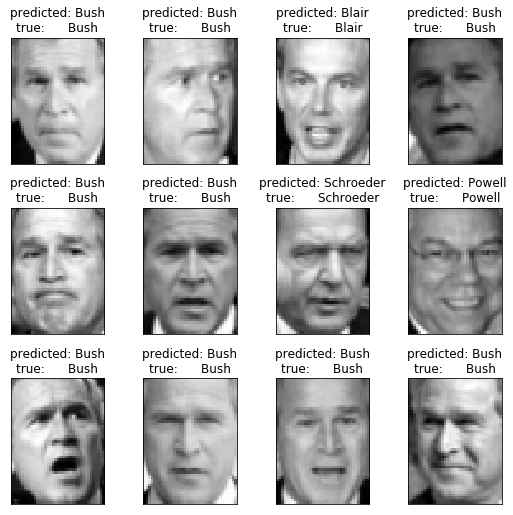

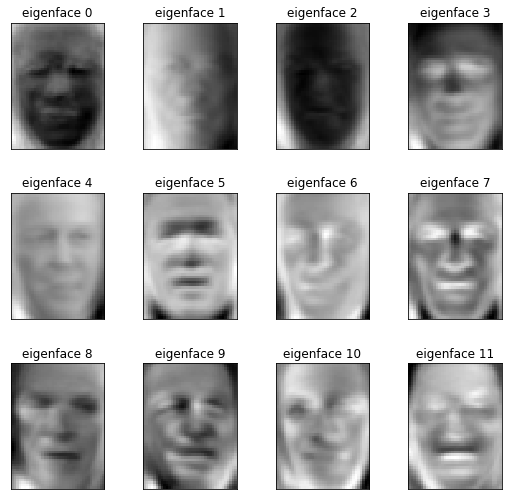

In [289]:
"""
===================================================
Faces recognition example using eigenfaces and SVMs
===================================================

The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

  .. _LFW: http://vis-www.cs.umass.edu/lfw/

  original source: http://scikit-learn.org/stable/auto_examples/applications/face_recognition.html

"""
print(__doc__)

from time import time
import logging
import pylab as pl
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import RandomizedPCA
from sklearn.svm import SVC

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

###############################################################################
# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape
np.random.seed(42)

# for machine learning we use the data directly (as relative pixel
# position info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print( "Total dataset size:")
print( "n_samples: %d" % n_samples)
print ("n_features: %d" % n_features)
print ("n_classes: %d" % n_classes)


###############################################################################
# Split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

###############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print( "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))
t0 = time()
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)
print( "done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print( "Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print( "done in %0.3fs" % (time() - t0))


###############################################################################
# Train a SVM classification model

print("Fitting the classifier to the training set")
      
t0 = time()
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
# for sklearn version 0.16 or prior, the class_weight parameter value is 'auto'
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print( "done in %0.3fs" % (time() - t0))
print( "Best estimator found by grid search:")
print( clf.best_estimator_)


###############################################################################
# Quantitative evaluation of the model quality on the test set

print( "Predicting the people names on the testing set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print( "done in %0.3fs" % (time() - t0))

print( classification_report(y_test, y_pred, target_names=target_names))
print (confusion_matrix(y_test, y_pred, labels=range(n_classes)))


###############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i].reshape((h, w)), cmap=pl.cm.gray)
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                         for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

pl.show()


We mentioned that PCA will order the principal components, with the first PC giving the direction of maximal variance, second PC has second-largest variance, and so on. How much of the variance is explained by the first principal component? The second?

In [291]:
pca.explained_variance_ratio_

array([ 0.19346534,  0.15116844,  0.07083676,  0.05951789,  0.05157496,
        0.02887157,  0.02514488,  0.02176469,  0.02019382,  0.01902124,
        0.01682212,  0.01580598,  0.01223364,  0.01087937,  0.01064453,
        0.00979653,  0.00892398,  0.00854844,  0.0083571 ,  0.00722635,
        0.00696569,  0.00653856,  0.00639557,  0.00561316,  0.00531106,
        0.00520151,  0.00507464,  0.00484208,  0.00443587,  0.00417828,
        0.00393703,  0.00381726,  0.00356056,  0.00351197,  0.0033455 ,
        0.00329926,  0.00314617,  0.0029621 ,  0.00290121,  0.00284714,
        0.00279994,  0.00267542,  0.00259886,  0.00258392,  0.00240906,
        0.00238966,  0.0023538 ,  0.00222561,  0.00217476,  0.00216537,
        0.00208985,  0.00205375,  0.00200398,  0.00197357,  0.0019379 ,
        0.00188716,  0.00180124,  0.00178837,  0.00174787,  0.00172993,
        0.00165604,  0.00162909,  0.00157346,  0.00153322,  0.00149861,
        0.00147128,  0.00143771,  0.00141791,  0.00139591,  0.00

Now you'll experiment with keeping different numbers of principal components. In a multiclass classification problem like this one (more than 2 labels to apply), accuracy is a less-intuitive metric than in the 2-class case. Instead, a popular metric is the F1 score.

We’ll learn about the F1 score properly in the lesson on evaluation metrics, but you’ll figure out for yourself whether a good classifier is characterized by a high or low F1 score. You’ll do this by varying the number of principal components and watching how the F1 score changes in response.

As you add more principal components as features for training your classifier, do you expect it to get better or worse performance?

Extracting the top 100 eigenfaces from 966 faces
done in 0.096s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.008s
Fitting the classifier to the training set


C:\ProgramData\Anaconda3\envs\ttf\lib\site-packages\sklearn\utils\deprecation.py:57: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


done in 10.181s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Predicting the people names on the testing set
done in 0.032s
                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.62      0.64        13
     Colin Powell       0.83      0.90      0.86        60
  Donald Rumsfeld       0.75      0.67      0.71        27
    George W Bush       0.91      0.96      0.93       146
Gerhard Schroeder       0.83      0.80      0.82        25
      Hugo Chavez       0.91      0.67      0.77        15
       Tony Blair       0.91      0.81      0.85        36

      avg / total       0.87      0.87      0.86       322

[[  8   1   3   1   0   0   0]
 [  1  54   1   3   0   1   0]
 [  2   1  18   6   0   0   0]
 [  1   4   1 140   0   0

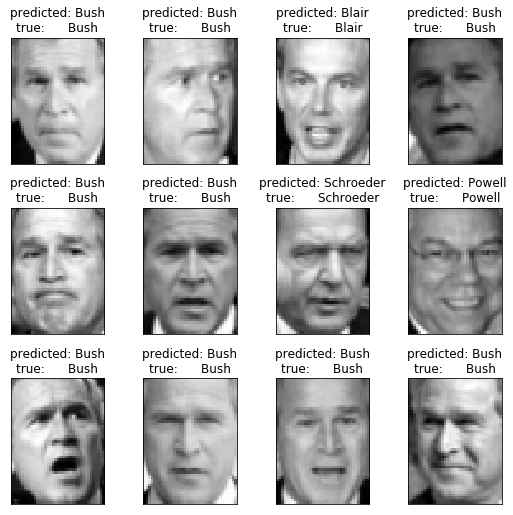

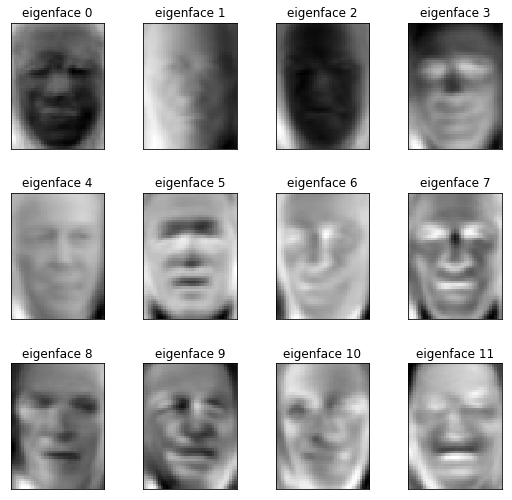

In [292]:
n_components = 100

print( "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))
t0 = time()
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)
print( "done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print( "Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print( "done in %0.3fs" % (time() - t0))


###############################################################################
# Train a SVM classification model

print("Fitting the classifier to the training set")
      
t0 = time()
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
# for sklearn version 0.16 or prior, the class_weight parameter value is 'auto'
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print( "done in %0.3fs" % (time() - t0))
print( "Best estimator found by grid search:")
print( clf.best_estimator_)


###############################################################################
# Quantitative evaluation of the model quality on the test set

print( "Predicting the people names on the testing set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print( "done in %0.3fs" % (time() - t0))

print( classification_report(y_test, y_pred, target_names=target_names))
print (confusion_matrix(y_test, y_pred, labels=range(n_classes)))


###############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i].reshape((h, w)), cmap=pl.cm.gray)
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                         for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

pl.show()


### Cross validation

In this mini-project, you’ll start from scratch in making a training-testing split in the data. This will be the first step toward your final project, of building a POI identifier.

In [302]:
"""
    Starter code for the validation mini-project.
    The first step toward building your POI identifier!

    Start by loading/formatting the data

    After that, it's not our code anymore--it's yours!
"""

import pickle
import sys


data_dict = pickle.load(open("data/final_project_dataset.pkl", "rb") )

### first element is our labels, any added elements are predictor
### features. Keep this the same for the mini-project, but you'll
### have a different feature list when you do the final project.
features_list = ["poi", "salary"]

data = featureFormat(data_dict, features_list,sort_keys = 'data/python2_lesson06_keys.pkl')
labels, features = targetFeatureSplit(data)

from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, labels, test_size=0.3, random_state=42)
train_color = "b"
test_color = "r"

### it's all yours from here forward!  
from sklearn import tree
t0 = time()
clf_DTX = tree.DecisionTreeClassifier()
clf_DTX.fit(feature_train, target_train)
print("training time:", round(time()-t0, 3), "s")

t0 = time()
acc = accuracy_score(clf_DTX.predict(feature_test), target_test)
print('accuracy: ',acc)
print("prediction time:", round(time()-t0, 3), "s")


training time: 0.0 s
accuracy:  0.785714285714
prediction time: 0.011 s


### EVALUATION

Go back to your code from the last section, where you built a simple first iteration of a POI identifier using a decision tree and one feature. 

In [310]:
import pickle
import sys


data_dict = pickle.load(open("data/final_project_dataset.pkl", "rb") )

### first element is our labels, any added elements are predictor
### features. Keep this the same for the mini-project, but you'll
### have a different feature list when you do the final project.
features_list = ["poi", "salary"]

data = featureFormat(data_dict, features_list,sort_keys = 'data/python2_lesson06_keys.pkl')
labels, features = targetFeatureSplit(data)

from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, labels, test_size=0.3, random_state=42)
train_color = "b"
test_color = "r"

### it's all yours from here forward!  
from sklearn import tree
t0 = time()
clf_DTX = tree.DecisionTreeClassifier()
clf_DTX.fit(feature_train, target_train)
print("training time:", round(time()-t0, 3), "s")

t0 = time()
acc = accuracy_score(clf_DTX.predict(feature_test), target_test)
print('accuracy: ',acc)
print("prediction time:", round(time()-t0, 3), "s")

training time: 0.0 s
accuracy:  0.785714285714
prediction time: 0.009 s


**accuracy is high but let check the true positive**

In [331]:
print((clf_DTX.predict(feature_test)+target_test)==2)
print([int(x) for x in target_test])
print([int(x) for x in clf_DTX.predict(feature_test)])

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0]
[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


** we want to find POI but we find not even one of them, accuracy in this case is not a good way to evaluate the result**

As you may now see, having imbalanced classes like we have in the Enron dataset (many more non-POIs than POIs) introduces some special challenges, namely that you can just guess the more common class label for every point, not a very insightful strategy, and still get pretty good accuracy!

Precision and recall can help illuminate your performance better. Use the precision_score and recall_score available in sklearn.metrics to compute those quantities.

In [317]:
from sklearn.metrics import precision_score
average_precision = precision_score(target_test, clf_DTX.predict(feature_test))

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.00


In [335]:
from sklearn.metrics import recall_score
recall_score(target_test, clf_DTX.predict(feature_test), average='binary')  

0.0

In the final project you’ll work on optimizing your POI identifier, using many of the tools learned in this course. Hopefully one result will be that your precision and/or recall will go up, but then you’ll have to be able to interpret them. 

Here are some made-up predictions and true labels for a hypothetical test set; fill in the following boxes to practice identifying true positives, false positives, true negatives, and false negatives. Let’s use the convention that “1” signifies a positive result, and “0” a negative. 

predictions = [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1]   
true labels = [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0]

How many true positives are there? **6**  
How many true negatives are there in this example? **9**  
How many false positives are there? **3**  
How many false negatives are there? **2**

In [337]:
predictions = [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1]
true_labels = [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0]
print("precision: ",precision_score(true_labels, predictions))
print("recall: ", recall_score(true_labels, predictions))

precision:  0.666666666667
recall:  0.75


“My identifier have great **recall**, but it doesn't have good **precision**. That means that, nearly every time a POI shows up in my test set, I am able to identify him or her. The cost of this is that I sometimes get some false positives, where non-POIs get flagged.”


“My identifier have great **precision**, but it doesn't have good **recall** That means that whenever a POI gets flagged in my test set, I know with a lot of confidence that it’s very likely to be a real POI and not a false alarm. On the other hand, the price I pay for this is that I sometimes miss real POIs, since I’m effectively reluctant to pull the trigger on edge cases.”

<img src='image/3.png'>

“My identifier has a really great **F1_score**.

This is the best of both worlds. Both my false positive and false negative rates are **low**, which means that I can identify POI’s reliably and accurately. If my identifier finds a POI then the person is almost certainly a POI, and if the identifier does not flag someone, then they are almost certainly not a POI.”

There’s usually a tradeoff between precision and recall--which one do you think is more important in your POI identifier? There’s no right or wrong answer, there are good arguments either way, but you should be able to interpret both metrics and articulate which one you find most important and why.